### Importing necessary libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
import warnings
warnings.filterwarnings('ignore')

In [2]:
braintumor = pd.read_csv("Brain Tumor.csv")  

In [3]:
braintumor.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.460000e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.460000e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.460000e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.460000e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.460000e-155


In [4]:
braintumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

# EDA

### Univariate Analysis

In [5]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()

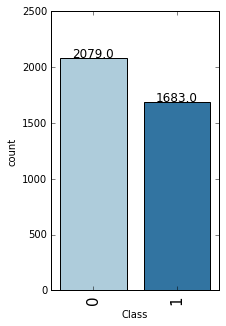

In [6]:
labeled_barplot(braintumor, "Class")

In [7]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

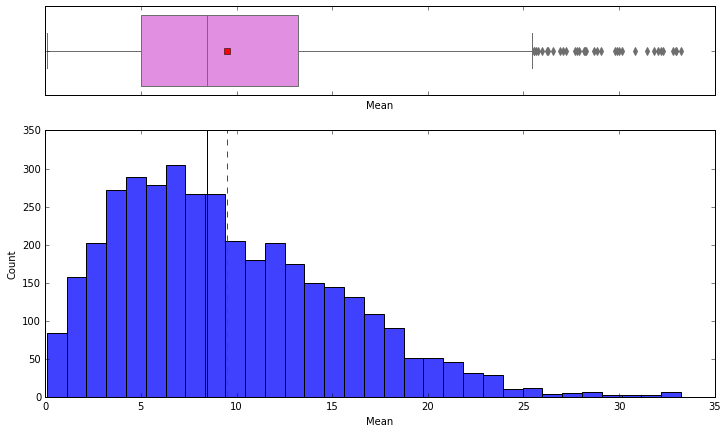

In [8]:
histogram_boxplot(braintumor, "Mean")

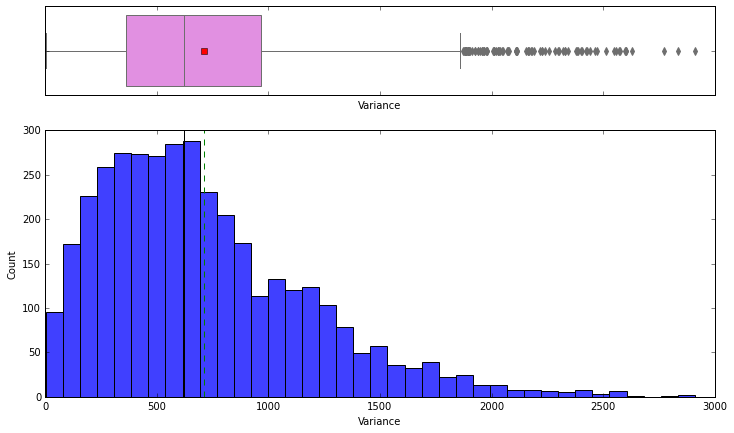

In [9]:
histogram_boxplot(braintumor, "Variance")

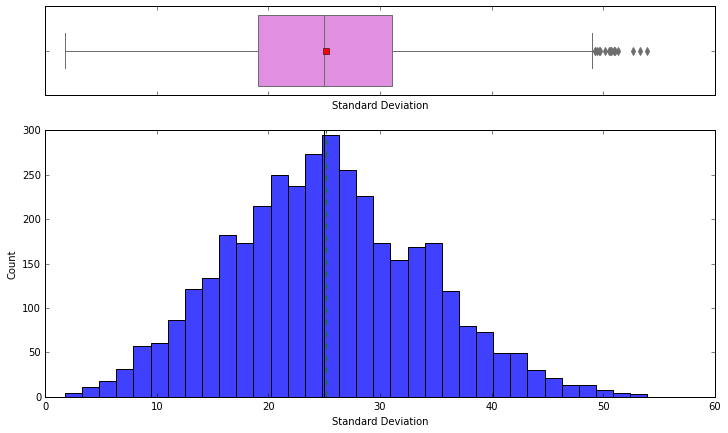

In [10]:
histogram_boxplot(braintumor, "Standard Deviation")

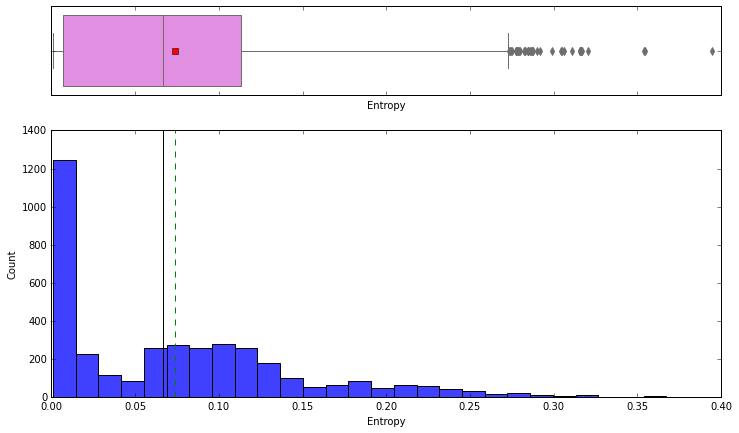

In [11]:
histogram_boxplot(braintumor, "Entropy")

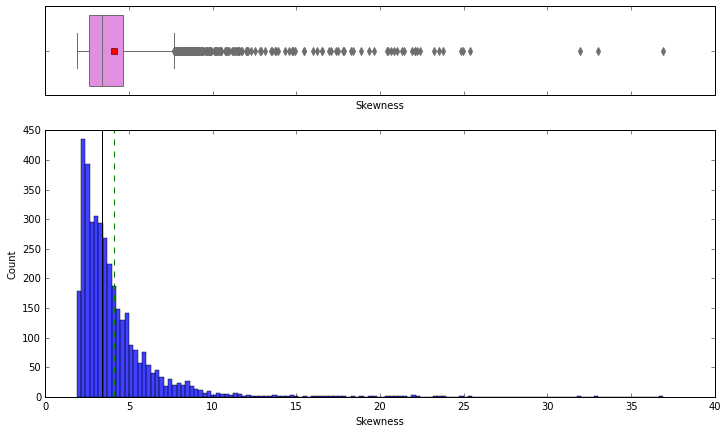

In [12]:
histogram_boxplot(braintumor, "Skewness")

In [13]:
braintumor.drop(braintumor[braintumor.Skewness>7].index,inplace=True,axis=0)

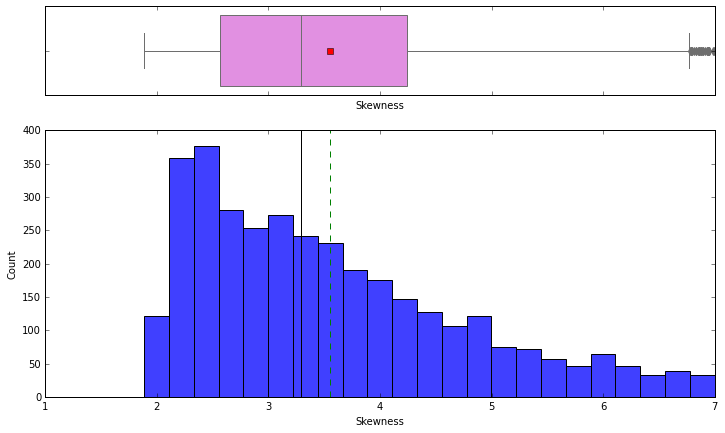

In [14]:
histogram_boxplot(braintumor, "Skewness")

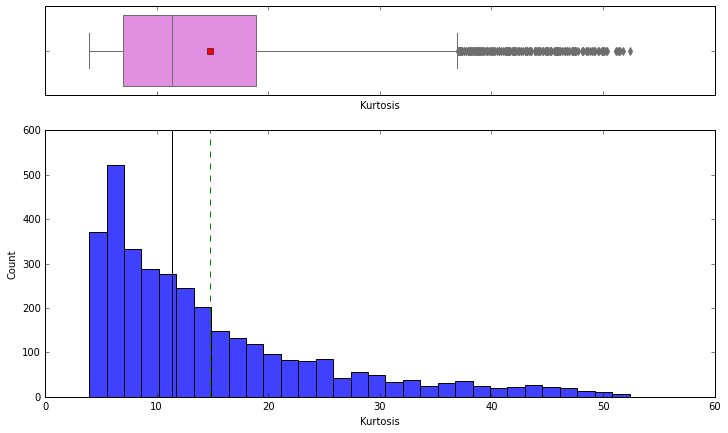

In [15]:
histogram_boxplot(braintumor, "Kurtosis")

In [16]:
braintumor.drop(braintumor[braintumor.Kurtosis>100].index,inplace=True,axis=0)

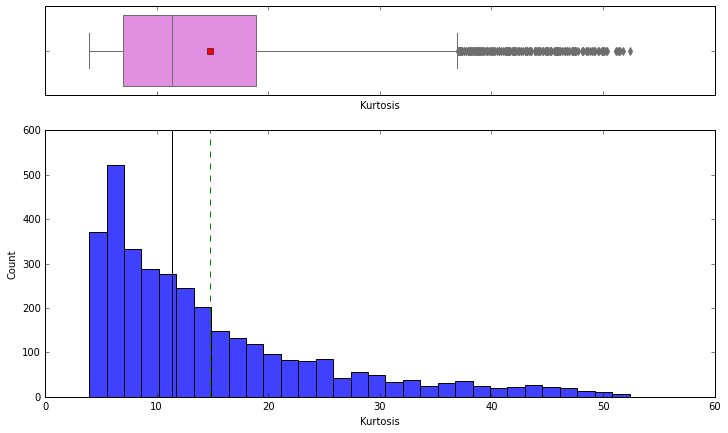

In [17]:
histogram_boxplot(braintumor, "Kurtosis")

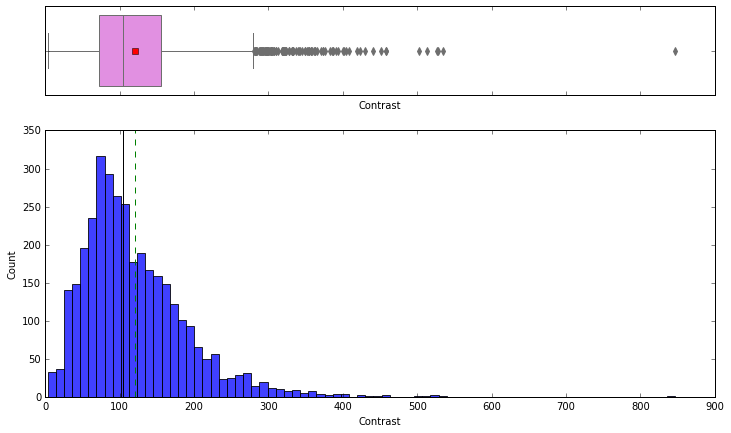

In [18]:
histogram_boxplot(braintumor, "Contrast")

In [19]:
braintumor.drop(braintumor[braintumor.Contrast>300].index,inplace=True,axis=0)

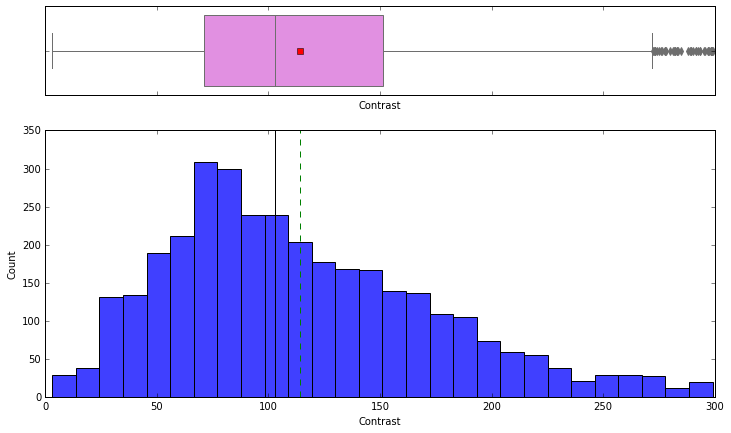

In [20]:
histogram_boxplot(braintumor, "Contrast")

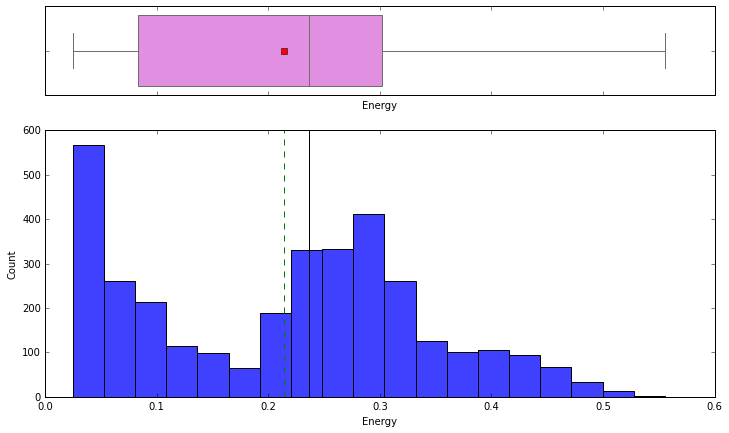

In [21]:
histogram_boxplot(braintumor, "Energy")

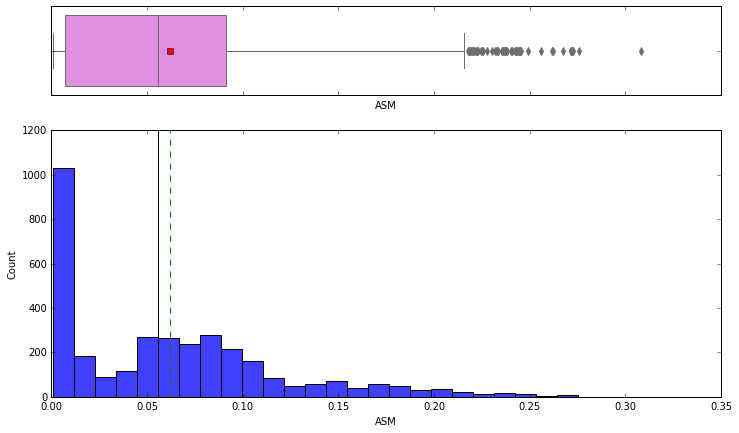

In [22]:
histogram_boxplot(braintumor, "ASM")

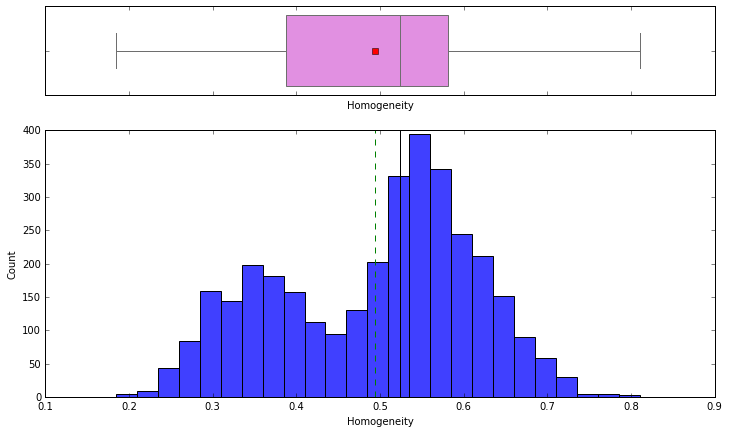

In [23]:
histogram_boxplot(braintumor, "Homogeneity")

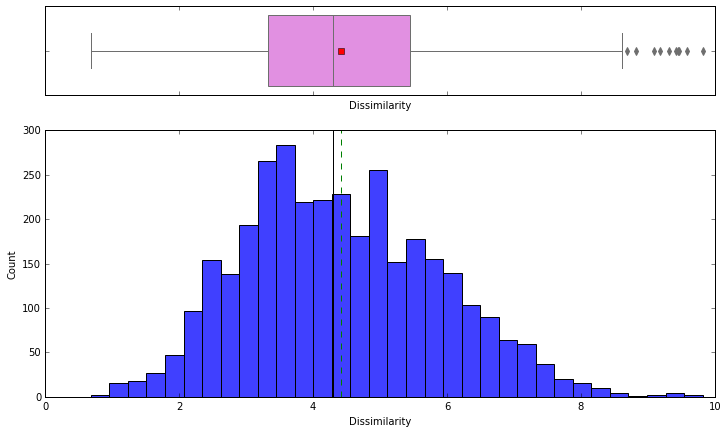

In [24]:
histogram_boxplot(braintumor, "Dissimilarity")

In [25]:
braintumor.drop(braintumor[braintumor.Dissimilarity>9].index,inplace=True,axis=0)

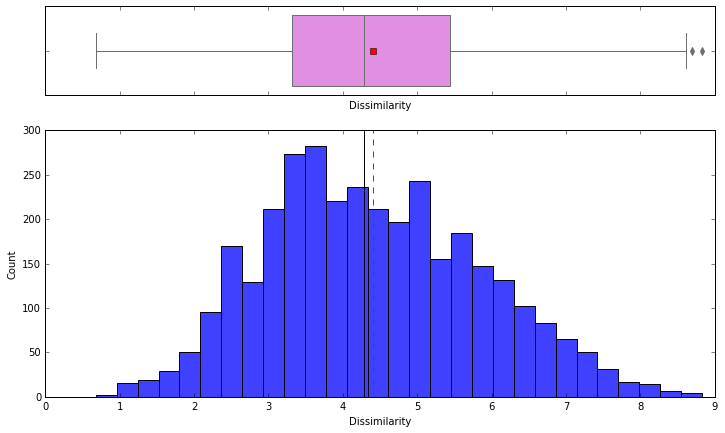

In [26]:
histogram_boxplot(braintumor, "Dissimilarity")

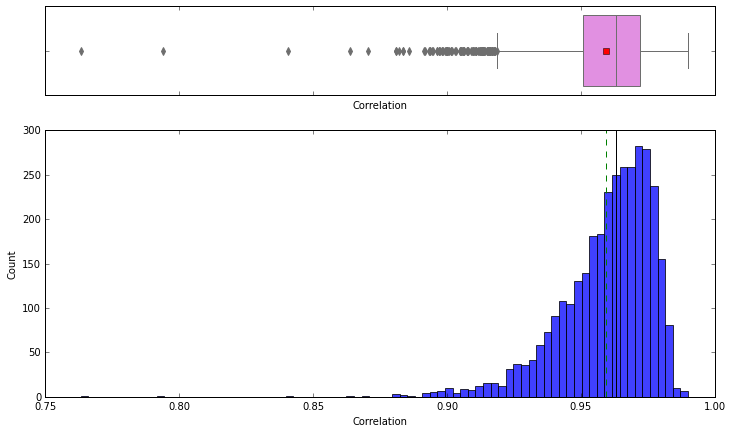

In [27]:
histogram_boxplot(braintumor, "Correlation")

In [28]:
braintumor.drop(braintumor[braintumor.Correlation<0.92].index,inplace=True,axis=0)

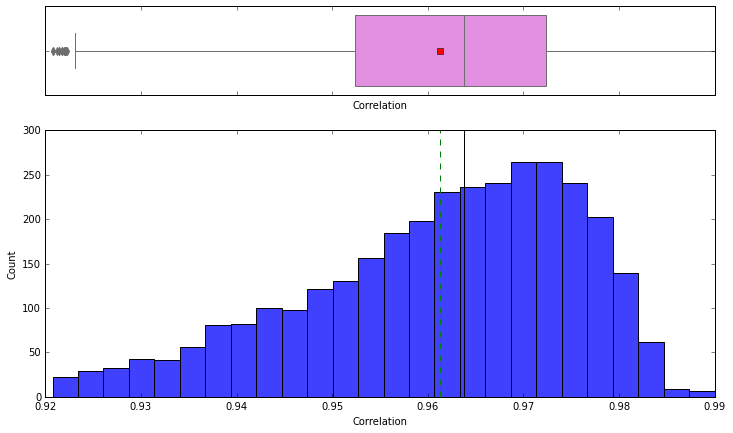

In [29]:
histogram_boxplot(braintumor, "Correlation")

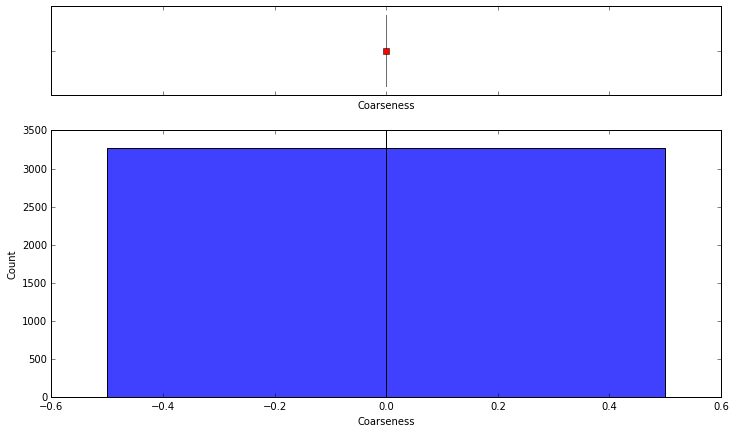

In [30]:
histogram_boxplot(braintumor, "Coarseness")

In [31]:
braintumor.drop(braintumor[braintumor.Coarseness<-1.0].index,inplace=True,axis=0)

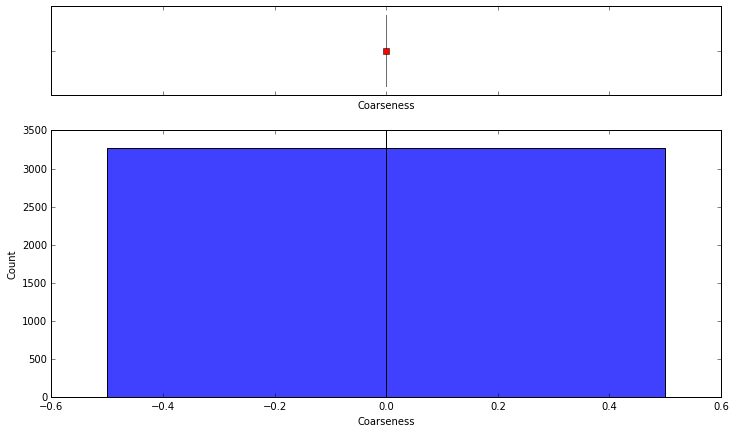

In [32]:
histogram_boxplot(braintumor, "Coarseness")

### Bivariate Analsysis

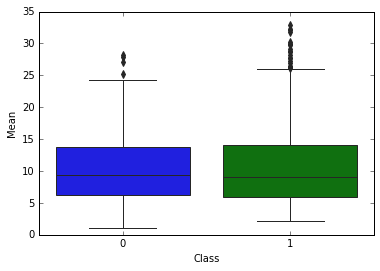

In [33]:
vis2 = sns.boxplot(data=braintumor, x= "Class", y= "Mean")

In [34]:
#Import pandas module
import pandas as pd

# Gather/melt the data frame for plots
b_melt = pd.melt(braintumor, id_vars='Class', value_vars=['Energy','Entropy','ASM','Homogeneity'],var_name='Features',
value_name='value')
# Gather/melt the data frame for plots
b_melt2 = pd.melt(braintumor, id_vars='Class', value_vars=['Mean','Standard Deviation','Skewness',
                                                     'Dissimilarity'],var_name='Features',
value_name='value')
b_melt3 = pd.melt(braintumor, id_vars='Class', value_vars=['Kurtosis','Contrast'],var_name='Features',
value_name='value')

print(b_melt)

       Class     Features     value
0          0       Energy  0.293314
1          0       Energy  0.475051
2          1       Energy  0.031917
3          1       Energy  0.032024
4          0       Energy  0.343849
...      ...          ...       ...
13083      0  Homogeneity  0.487131
13084      0  Homogeneity  0.502712
13085      0  Homogeneity  0.492269
13086      0  Homogeneity  0.480064
13087      0  Homogeneity  0.494333

[13088 rows x 3 columns]


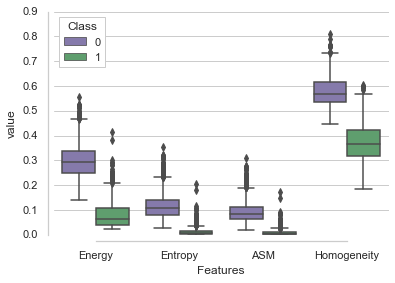

In [35]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn
  
# importing the required module
import seaborn
 
# use to set style of background of plot
seaborn.set(style="whitegrid")
 
seaborn.boxplot(x ="Features",
             y ="value",
             hue ="Class",
             palette = ["m","g"],
             data = b_melt)
sns.despine(offset=6, trim=True)


#import seaborn as sns
#sns.set_theme(style="ticks", palette="pastel")

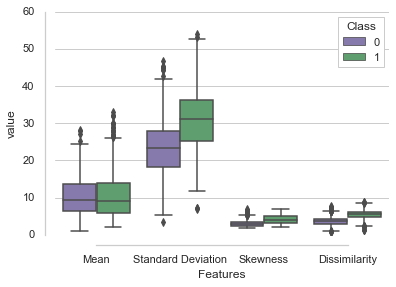

In [36]:

seaborn.boxplot(x ="Features",
             y ="value",
             hue ="Class",
             palette = ["m","g"],
             data = b_melt2)
sns.despine(offset=10, trim=True)

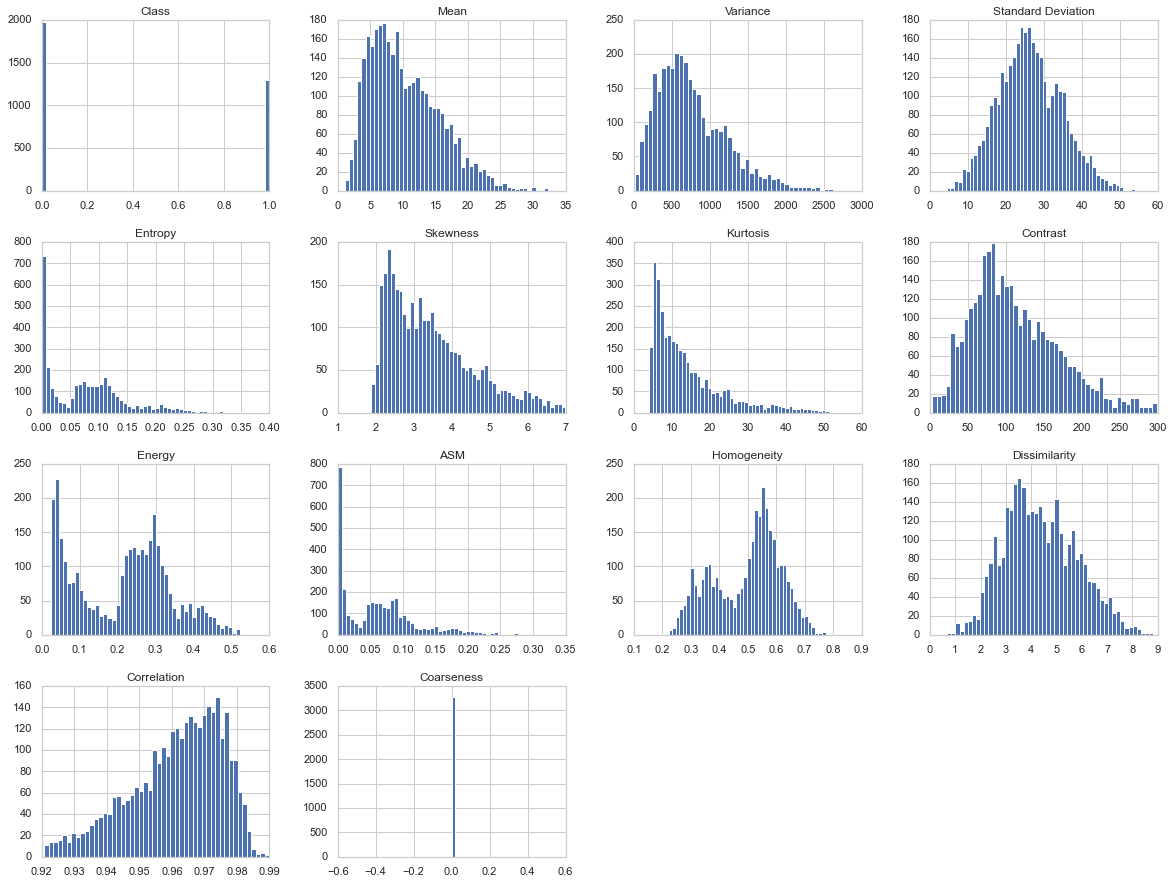

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
braintumor.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: >

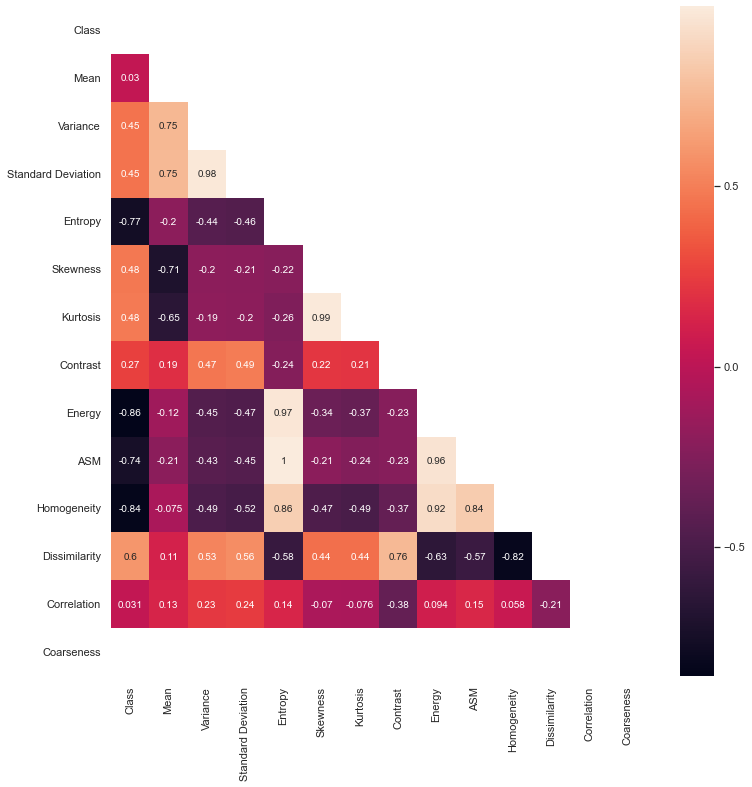

In [38]:
corr_matrix = braintumor.corr()
corr_matrix['Class'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 12)) 
mask = np.zeros_like(braintumor.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(braintumor.corr(), mask= mask, ax= ax, annot= True)

## Random Forest

In [39]:
X = braintumor.drop(["Image", "Class"], axis=1)
Y = braintumor["Class"]

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=1)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [41]:
predictions = rf_model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,

In [42]:
rf_model.predict_proba(X_test)

array([[0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02]])

In [43]:
rf_model.classes_

array([0, 1], dtype=int64)

In [44]:
X.columns

Index(['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness',
       'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity',
       'Correlation', 'Coarseness'],
      dtype='object')

In [45]:
rf_model.feature_importances_ 

array([0.00770639, 0.00867602, 0.01754286, 0.25563823, 0.0264833 ,
       0.04408209, 0.00479898, 0.2110492 , 0.22342322, 0.13111193,
       0.06330127, 0.0061865 , 0.        ])

In [46]:
Y_pred = rf_model.predict(X_test)

In [47]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9898167006109979


 The importance of feature '12' is 0.77%.
 The importance of feature '6' is 0.87%.
 The importance of feature '11' is 1.75%.
 The importance of feature '0' is 25.56%.
 The importance of feature '1' is 2.65%.
 The importance of feature '2' is 4.41%.
 The importance of feature '4' is 0.48%.
 The importance of feature '5' is 21.1%.
 The importance of feature '10' is 22.34%.
 The importance of feature '9' is 13.11%.
 The importance of feature '7' is 6.33%.
 The importance of feature '8' is 0.62%.
 The importance of feature '3' is 0.0%.


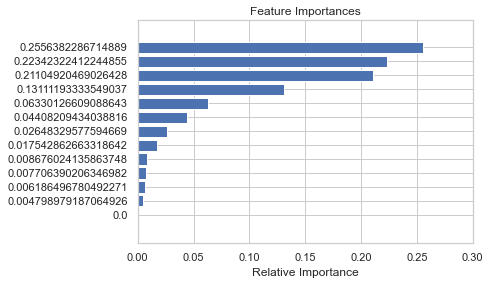

In [48]:
importance = rf_model.feature_importances_
columns = np.argsort(importance)

i = 0
while i < len(columns):
    print(f" The importance of feature '{columns[i]}' is {round(importance[i] * 100, 2)}%.")
    i+= 1
    
plt.title('Feature Importances')
plt.barh(range(len(columns)), importance[columns], color='b', align='center')
plt.yticks(range(len(columns)), [importance[i] for i in columns])
plt.xlabel('Relative Importance')
plt.show()

## Descision Tree

In [49]:
feature_cols = ['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness',
       'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity',
       'Correlation', 'Coarseness']
x = braintumor[feature_cols]
y = braintumor["Class"]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9837067209775967


In [53]:
conda install python-pydotplus

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - python-pydotplus

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




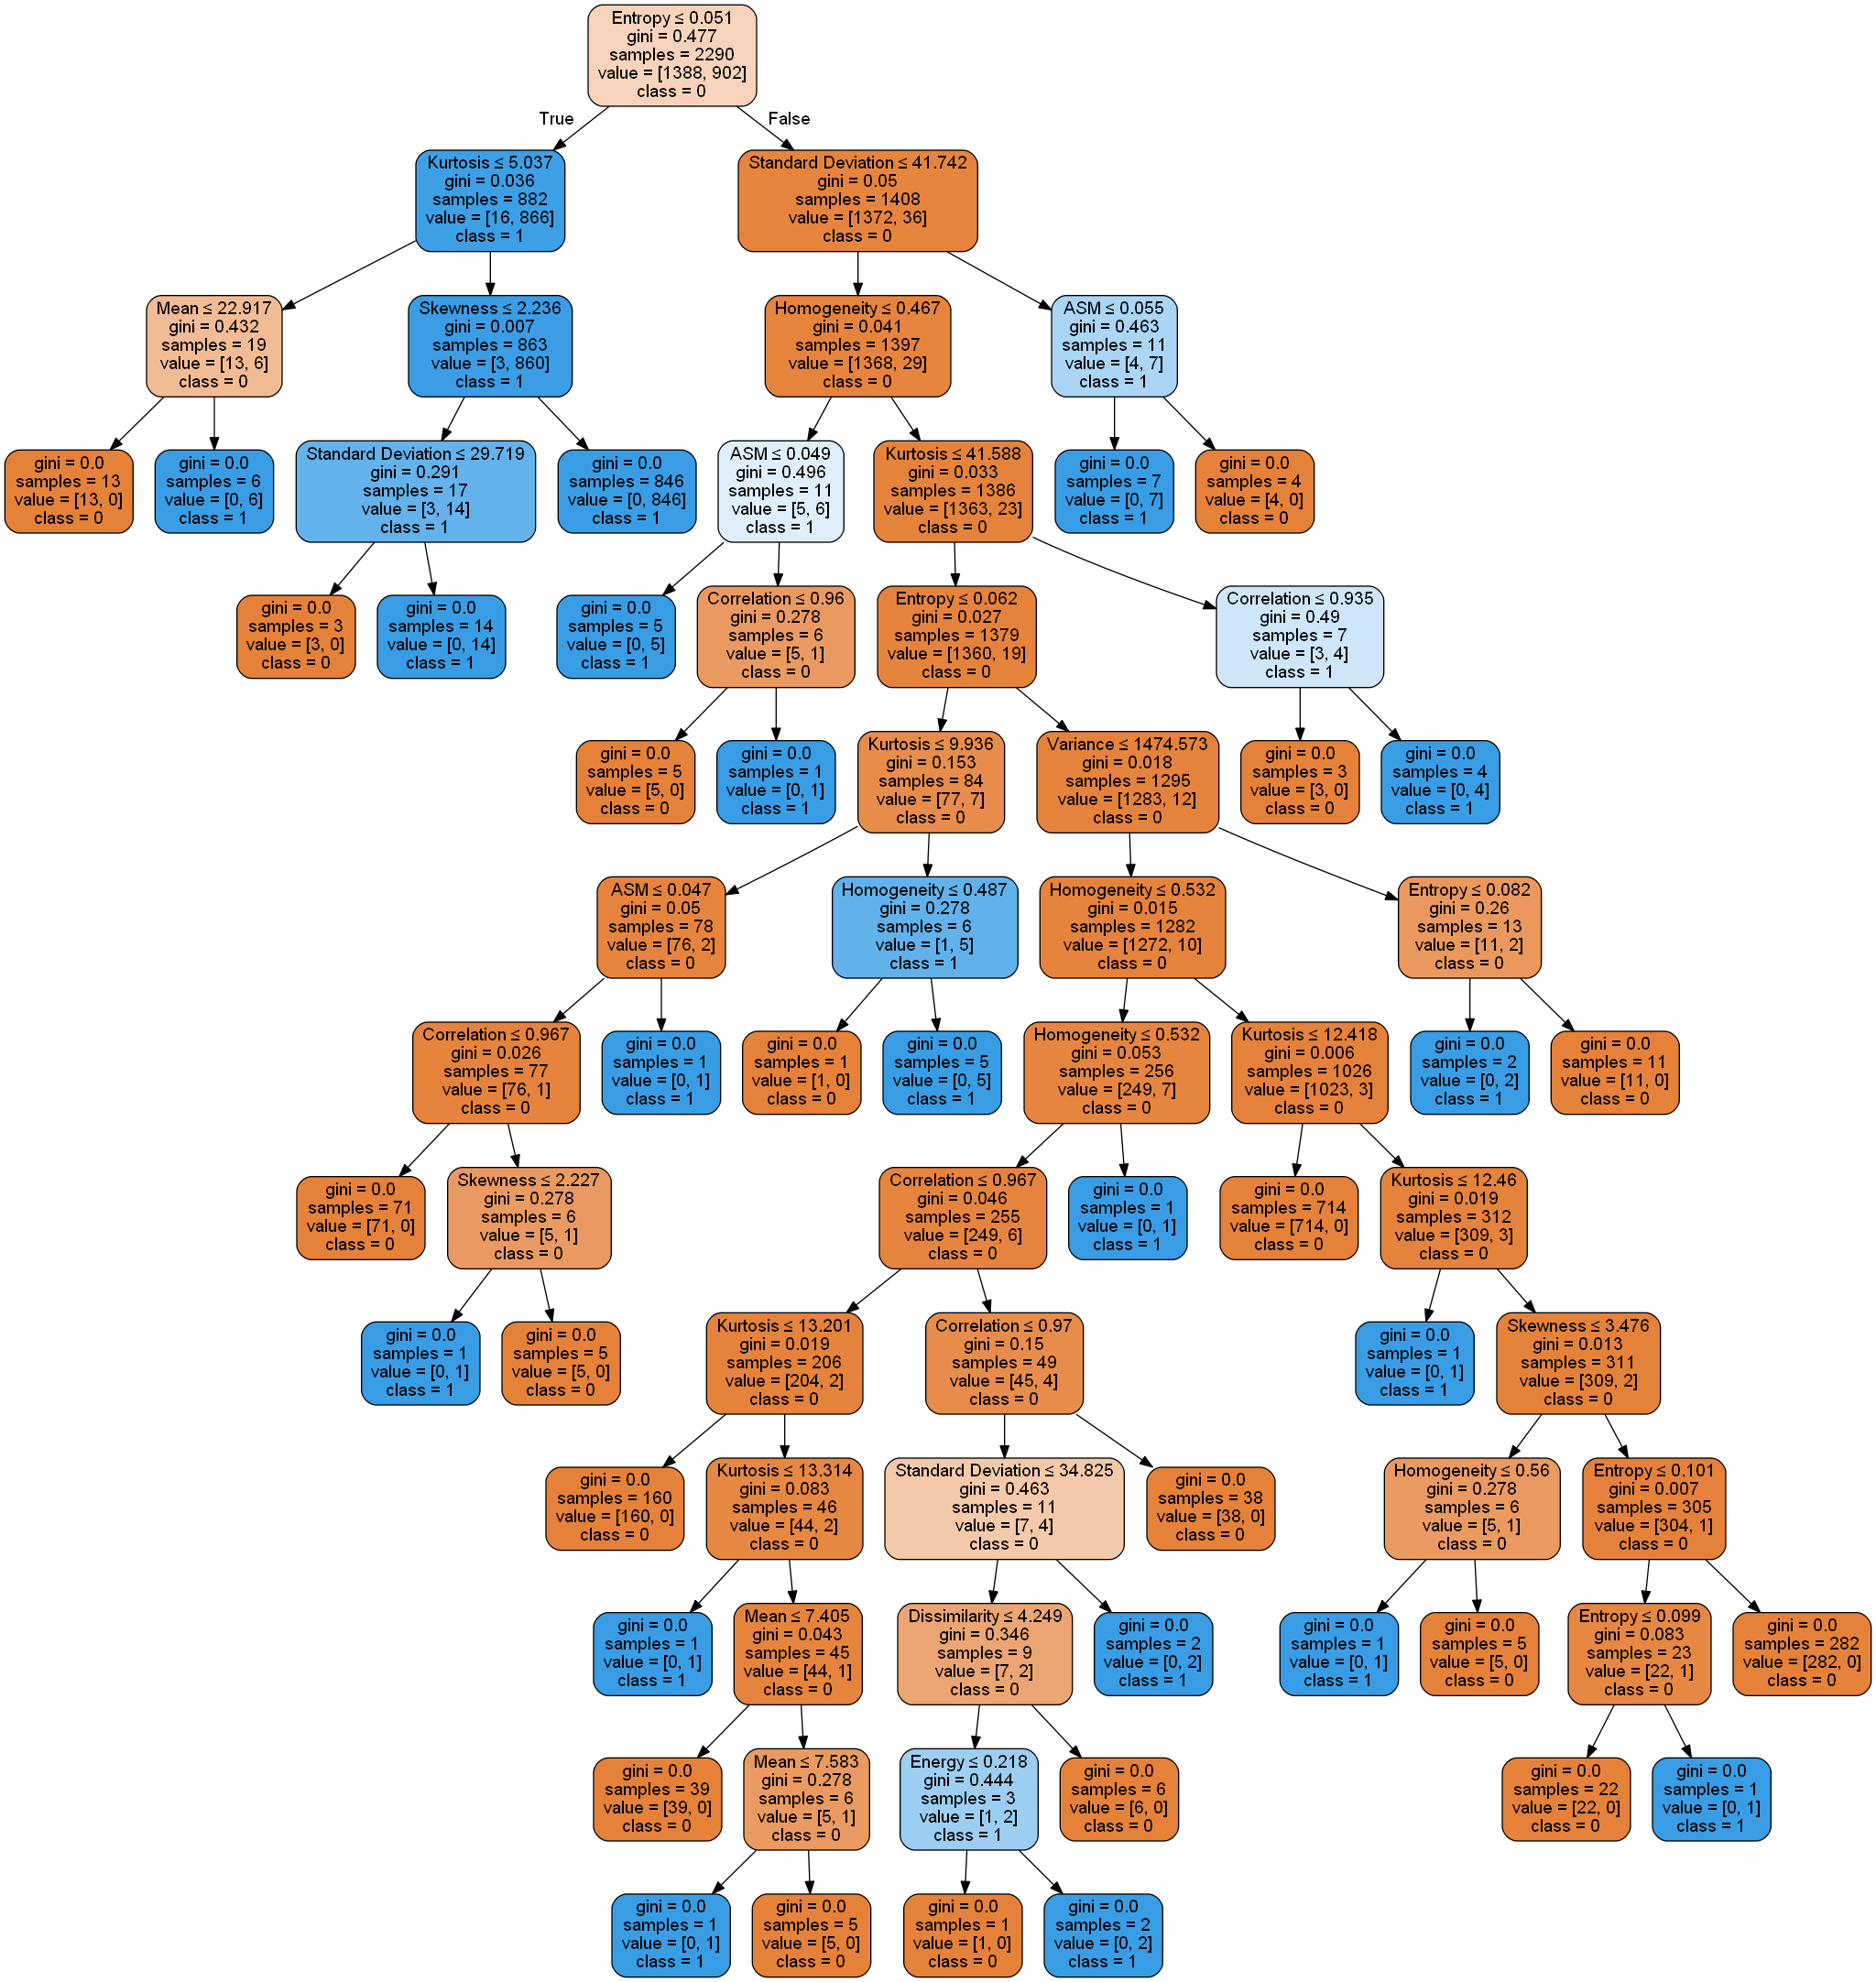

In [54]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtpic.png')
Image(graph.create_png())

In [55]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9826883910386965


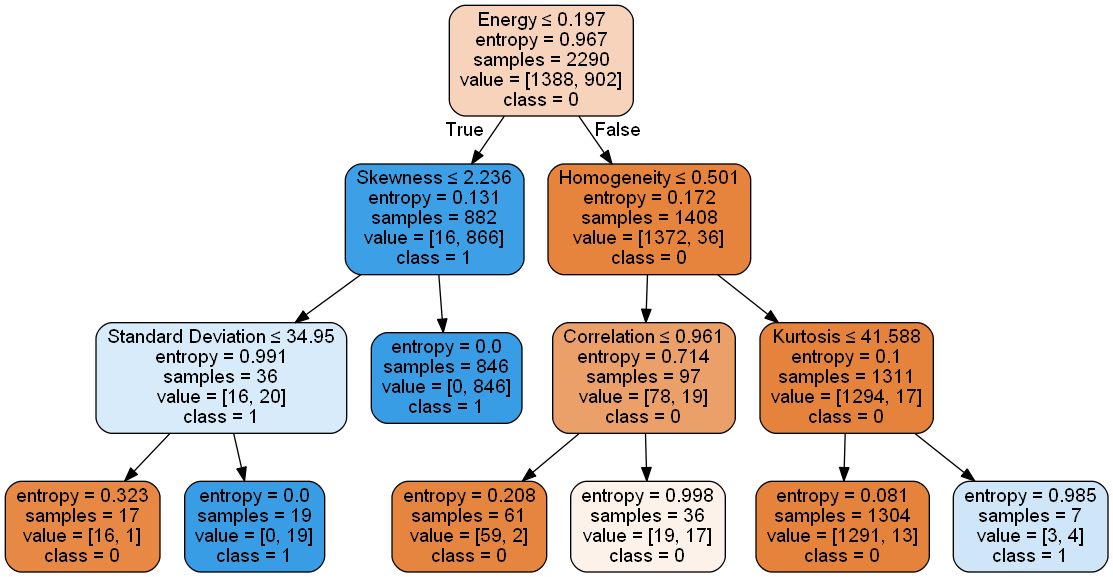

In [56]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtpic.png')
Image(graph.create_png())

In [57]:
clf.feature_importances_

array([0.        , 0.        , 0.01473537, 0.        , 0.03892157,
       0.00925032, 0.        , 0.90676885, 0.        , 0.02026956,
       0.        , 0.01005433, 0.        ])

In [58]:
importance = clf.feature_importances_
columns = x.columns
i = 0
while i < len(columns):
    print(f" The importance of feature '{columns[i]}' is {round(importance[i] * 100, 2)}%.")
    i+= 1

 The importance of feature 'Mean' is 0.0%.
 The importance of feature 'Variance' is 0.0%.
 The importance of feature 'Standard Deviation' is 1.47%.
 The importance of feature 'Entropy' is 0.0%.
 The importance of feature 'Skewness' is 3.89%.
 The importance of feature 'Kurtosis' is 0.93%.
 The importance of feature 'Contrast' is 0.0%.
 The importance of feature 'Energy' is 90.68%.
 The importance of feature 'ASM' is 0.0%.
 The importance of feature 'Homogeneity' is 2.03%.
 The importance of feature 'Dissimilarity' is 0.0%.
 The importance of feature 'Correlation' is 1.01%.
 The importance of feature 'Coarseness' is 0.0%.


## Image Train Test Split

In [59]:
import os
import pandas as pd
import numpy as np
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.patches as mpatches
from sklearn.utils import shuffle
from tqdm import tqdm

In [60]:
base_dir  = 'C:\\Users\\aleev\\OneDrive\\Documents\\IST718\\Project'
#os.chdir(base_dir)
os.getcwd()

'C:\\Users\\aleev\\OneDrive\\Documents\\IST718\\Project'

In [61]:
df = pd.read_csv("BrainTumor.csv")[['Image', 'Class']]
display(df.head())
print(df.shape)

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


(3762, 2)


In [62]:
# Split Training + Validation with Testing Set
def split_size(df, size):
    return int(size * len(df))


train_labels = df['Class'].values[:split_size(df, 0.8)]
train_file_names = df['Image'].values[:split_size(df, 0.8)]

val_labels = df['Class'].values[split_size(df, 0.8):split_size(df, 0.9)]
val_file_names = df['Image'].values[split_size(df, 0.8):split_size(df, 0.9)]

test_labels = df['Class'].values[split_size(df, 0.9):]
test_file_names = df['Image'].values[split_size(df, 0.9):]

In [63]:
def split_array_labels(arr_image, arr_label):
    arr_image_0 = arr_image[np.where(arr_label==0)]
    arr_image_1 = arr_image[np.where(arr_label==1)]
    return {'0':arr_image_0, '1':arr_image_1}

In [64]:
train_arr_dict = split_array_labels(train_file_names, train_labels)
val_arr_dict = split_array_labels(val_file_names, val_labels)
test_arr_dict = split_array_labels(test_file_names, test_labels)

In [65]:
def create_empty_directories(base_dir):
    # in case you want to run it several times, delete the directory and create new one
    check_exist_path = os.path.join(base_dir, '_MODELLING')
    if os.path.isdir(check_exist_path):
        shutil.rmtree(check_exist_path)
        print("Remove old directories")
        
    for label in ['0','1']:
        training_dir = os.path.join(base_dir, '_MODELLING', 'training', label)
        validation_dir = os.path.join(base_dir, '_MODELLING', 'validation', label)
        testing_dir = os.path.join(base_dir, '_MODELLING', 'testing', label)
        
        
        
        os.makedirs(training_dir)
        os.makedirs(validation_dir)
        os.makedirs(testing_dir)
    print(f"Created empty  training, validation and testing directories")
create_empty_directories('C:\\Users\\aleev\\OneDrive\\Documents\\IST718\\Project\working')

Remove old directories
Created empty  training, validation and testing directories


In [66]:
def split_data(SOURCE_DIR, train_arr_dict, val_arr_dict, test_arr_dict):
    for label in tqdm(['0','1']):
        for file_name in train_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, 'BrainTumorData', file_name)
            destination = os.path.join('C:\\Users\\aleev\\OneDrive\\Documents\\IST718\\Project\working', '_MODELLING', 'training', label, file_name)
            copyfile(source, destination)

        for file_name in val_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, 'BrainTumorData', file_name)
            destination = os.path.join('C:\\Users\\aleev\\OneDrive\\Documents\\IST718\\Project\working', '_MODELLING', 'validation', label, file_name)
            copyfile(source, destination)
        
        for file_name in test_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, 'BrainTumorData', file_name)
            destination = os.path.join('C:\\Users\\aleev\\OneDrive\\Documents\\IST718\\Project\working', '_MODELLING', 'testing', label, file_name)
            copyfile(source, destination)
    print(f"Created training, validation and testing directories containing images")
    
split_data(base_dir,train_arr_dict,val_arr_dict,test_arr_dict)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.70s/it]

Created training, validation and testing directories containing images


## Convolutional Neural Network

In [83]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [68]:
tf.__version__

'2.11.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [69]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('working/_MODELLING/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3009 images belonging to 2 classes.


### Preprocessing the Test set

In [70]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('working/_MODELLING/testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 377 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [71]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [72]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [73]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [74]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [75]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [76]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [77]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [78]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [79]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
95/95 [==============================] - 10s 93ms/step - loss: 0.5041 - accuracy: 0.7517 - val_loss: 0.5256 - val_accuracy: 0.8196
Epoch 2/25
95/95 [==============================] - 9s 90ms/step - loss: 0.3596 - accuracy: 0.8475 - val_loss: 0.9617 - val_accuracy: 0.6472
Epoch 3/25
95/95 [==============================] - 9s 99ms/step - loss: 0.3265 - accuracy: 0.8641 - val_loss: 0.6488 - val_accuracy: 0.7401
Epoch 4/25
95/95 [==============================] - 9s 98ms/step - loss: 0.2787 - accuracy: 0.8804 - val_loss: 0.4889 - val_accuracy: 0.7798
Epoch 5/25
95/95 [==============================] - 10s 106ms/step - loss: 0.2821 - accuracy: 0.8880 - val_loss: 0.5655 - val_accuracy: 0.7719
Epoch 6/25
95/95 [==============================] - 9s 99ms/step - loss: 0.2511 - accuracy: 0.8983 - val_loss: 0.5386 - val_accuracy: 0.8223
Epoch 7/25
95/95 [==============================] - 10s 102ms/step - loss: 0.2448 - accuracy: 0.9010 - val_loss: 0.5102 - val_accuracy: 0.7772
Epoch 8/

## Part 4 - Making a single prediction

In [86]:
import numpy as np
import keras.utils as image
from tensorflow.keras.preprocessing import image
#from keras.preprocessing import image
test_image = image.load_img('working/_MODELLING/validation/0/Image3015.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'with tumor'
else:
  prediction = 'no tumor'

1/1 [==============================] - 0s 91ms/step


In [87]:
print(prediction)

no tumor


In [88]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8